In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

sns.set_theme()
np.random.seed(0)

In [2]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [3]:
may_flights = flights.query("month == 'May'")
oct_flights = flights.query("month == 'Oct'")
june_flights = flights.query("month == 'Jun'")

In [4]:


from matplotlib.legend import Legend
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.transforms as mtransforms
import matplotlib.text as mtext

In [5]:
class MyLine(Line2D):
    def __init__(self, *args, **kwargs):
        # we'll update the position when the line data is set
        self.text = mtext.Text(0, 0, '')
        super().__init__(*args, **kwargs)

        # we can't access the label attr until *after* the line is
        # initiated
        self.text.set_text(self.get_label())

    def set_figure(self, figure):
        self.text.set_figure(figure)
        super().set_figure(figure)

    def set_axes(self, axes):
        self.text.set_axes(axes)
        super().set_axes(axes)

    def set_transform(self, transform):
        # 2 pixel offset
        texttrans = transform + mtransforms.Affine2D().translate(2, 2)
        self.text.set_transform(texttrans)
        super().set_transform(transform)

    def set_data(self, x, y):
        if len(x):
            self.text.set_position((x[-1], y[-1]))

        super().set_data(x, y)

    def draw(self, renderer):
        # draw my label at the end of the line with 2 pixel offset
        super().draw(renderer)
        self.text.draw(renderer)

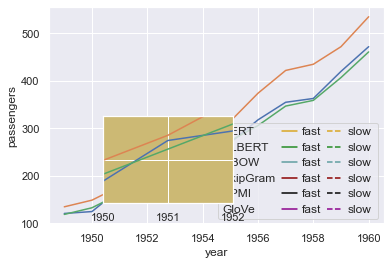

In [14]:
fig, ax = plt.subplots()
sns.lineplot(data=may_flights, x="year", y="passengers", ax=ax, label='may')
sns.lineplot(data=june_flights, x="year", y="passengers", ax=ax, label='june')
sns.lineplot(data=oct_flights, x="year", y="passengers", ax=ax, label='october')

ax2 = plt.axes([0.25, 0.2, .3, .3], facecolor='y')
sns.lineplot(data=may_flights, x="year", y="passengers", ax=ax2, legend=False)
sns.lineplot(data=june_flights, x="year", y="passengers", ax=ax2, legend=False)
g2 = sns.lineplot(data=oct_flights, x="year", y="passengers", ax=ax2, legend=False)
g2.set(yticklabels=[])
g2.set(xlabel=None)
g2.set(ylabel=None)
# ax2.set_title('zoom')
ax2.set_xlim([1950,1952])
ax2.set_ylim([100,200])

from matplotlib.legend_handler import HandlerBase
# params = {'legend.handlelength': 13}
# plt.rcParams.update(params)

class GroupObject(object):
    def __init__(self, group_name, color):
        self.group_name = group_name
        self.color = color

class GroupObjectHandler(HandlerBase):
    def create_artists(self, legend, orig_handle,
                       x0, y0, width, height, fontsize, trans):

        title = mtext.Text(x0,y0, text=orig_handle.group_name)
        fast_line = plt.Line2D([60,75], [(height/2), (height/2)], linestyle='solid', color=orig_handle.color)
        fast_title = mtext.Text(80,0, text='fast')
        slow_line = plt.Line2D([105,120], [(height/2), (height/2)], linestyle='dashed', color=orig_handle.color)
        slow_title = mtext.Text(125,0, text='slow')

        return [title, fast_line, fast_title, slow_line, slow_title]


    # def legend_artist(self, legend, orig_handle, fontsize, handlebox):
    #     x0, y0 = handlebox.xdescent, handlebox.ydescent
        
    #     c = MyLine([x0, 20], [y0, 0], label=orig_handle.group_name, c=orig_handle.color)
    #     handlebox.add_artist(c)
        
    #     return c

objects = [
    GroupObject('BERT', 'goldenrod'),
    GroupObject('ALBERT', 'forestgreen'),
    GroupObject('CBOW', 'cadetblue'),
    GroupObject('SkipGram', 'darkred'),
    GroupObject('PPMI', 'black'),
    GroupObject('GloVe', 'darkmagenta')
]

styles = ['-', '--', '-.', ':']

ax.legend(objects, ['' for _ in objects],
             loc='lower right', handler_map={GroupObject: GroupObjectHandler()}, handlelength=13)